<a href="https://colab.research.google.com/github/eshreyareddy/Dimensionality-reduction-techniques/blob/main/databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = '/content/Cuisine_rating.csv'  # Adjust the path according to where you've uploaded the file
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())


   User ID  Area code            Location  Gender   YOB Marital Status  \
0        1        153  Upper East Side,NY  Female  2006         Single   
1        2        123       St. George,NY  Female  1991        Married   
2        3        122  Upper West Side,NY    Male  1977         Single   
3        4        153  Upper East Side,NY  Female  1956        Married   
4        5        129     Central Park,NY    Male  1997         Single   

       Activity  Budget  Cuisines  Alcohol     Smoker  Food Rating  \
0  Professional       3  Japanese     Never     Never            5   
1       Student       3    Indian     Never  Socially            1   
2       Student       5   Seafood     Often     Often            5   
3  Professional       5  Japanese     Never  Socially            3   
4       Student       4  Filipino  Socially     Never            2   

   Service Rating  Overall Rating Often A S  
0               4             4.5        No  
1               1             1.0        N

In [4]:
# Identify categorical columns
# Assuming 'Location' is the only categorical column. Adjust this as per your dataset.
categorical_cols = ['Location']  # Replace with your actual categorical columns

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows to see the transformation
print(df_encoded.head())



   User ID  Area code  Gender   YOB Marital Status      Activity  Budget  \
0        1        153  Female  2006         Single  Professional       3   
1        2        123  Female  1991        Married       Student       3   
2        3        122    Male  1977         Single       Student       5   
3        4        153  Female  1956        Married  Professional       5   
4        5        129    Male  1997         Single       Student       4   

   Cuisines  Alcohol     Smoker  ...  Location_Cedar Hill, NY  \
0  Japanese     Never     Never  ...                        0   
1    Indian     Never  Socially  ...                        0   
2   Seafood     Often     Often  ...                        0   
3  Japanese     Never  Socially  ...                        0   
4  Filipino  Socially     Never  ...                        0   

   Location_Central Park,NY  Location_Central Park,ny Location_China Town, NY  \
0                         0                         0                  

Variance retained per principal component: [0.12238109 0.11363997]


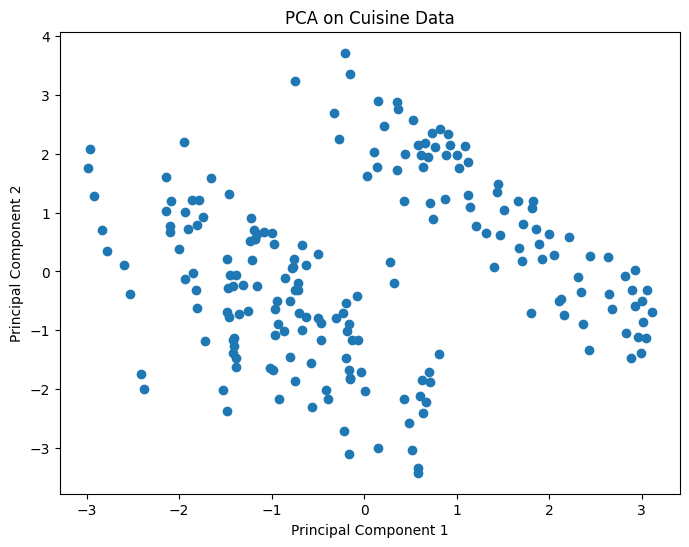

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Cuisine_rating.csv'  # Adjust the path according to where you've uploaded the file
df = pd.read_csv(file_path)

# Identify categorical columns
# Add all categorical column names to this list
categorical_cols = ['Gender', 'Location']  # Replace with your actual categorical columns

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.select_dtypes(include=np.number))

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert to a DataFrame for easier handling
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Print variance ratios
print("Variance retained per principal component:", pca.explained_variance_ratio_)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Cuisine Data')
plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

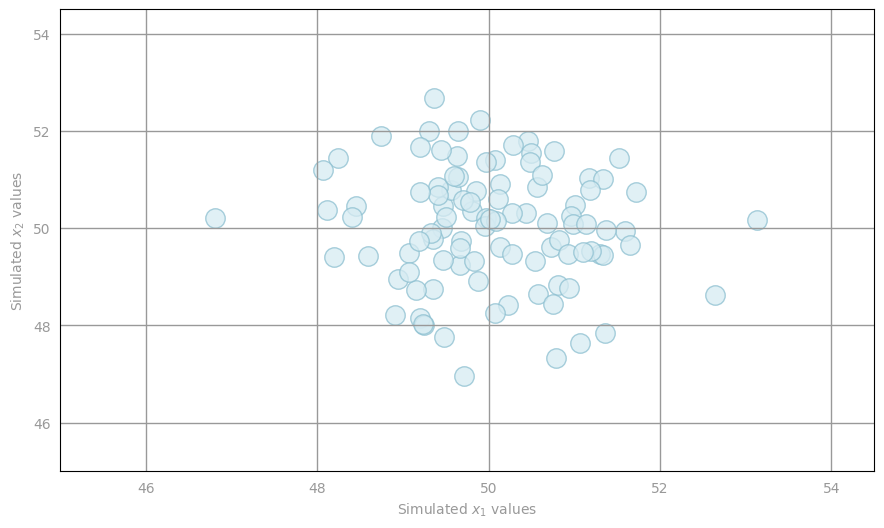

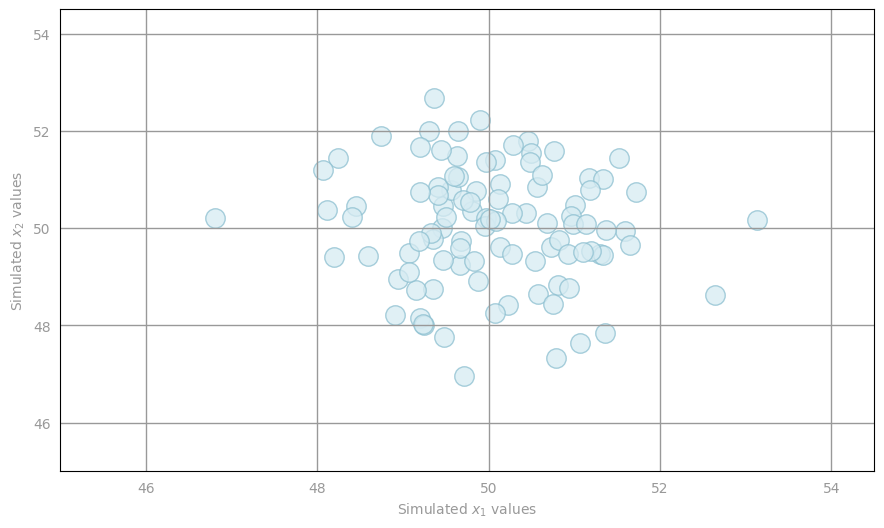

In [9]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45, 54.5), ax.set_ylim(45, 54.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
display(fig)

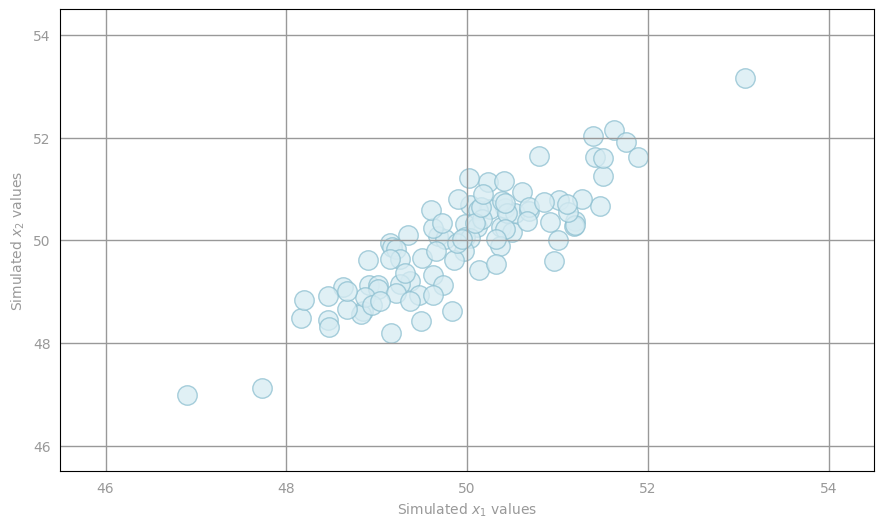

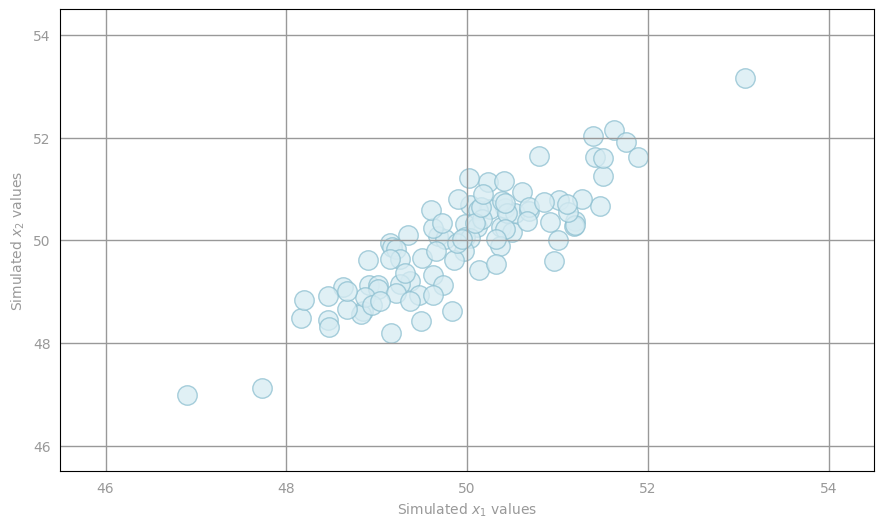

In [10]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5), ax.set_ylim(45.5, 54.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#d6ebf2',
            edgecolors='#8cbfd0', alpha=0.75)
display(fig)

In [16]:
!pip install pyspark







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=a38566b74cda0bc963befa1f6e1c9c8402184f150271cb39057cb190052a263a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [17]:
# Install PySpark
!pip install pyspark

# Import SparkContext
from pyspark import SparkContext

# Initialize Spark Context
sc = SparkContext.getOrCreate()

# Continue with your code
correlated_data = sc.parallelize(data_correlated)

# Calculate the mean of correlated_data
mean_correlated = correlated_data.mean()

# Subtract the mean from each data point
correlated_data_zero_mean = correlated_data.map(lambda x: x - mean_correlated)

# Print the results for verification
print(mean_correlated)
print(correlated_data.take(1))
print(correlated_data_zero_mean.take(1))


[49.95739037 49.97180477]
[array([49.6717712 , 50.07531969])]
[array([-0.28561917,  0.10351492])]


In [19]:
import numpy as np

# Assuming mean_correlated and correlated_data_zero_mean are already defined
expected_mean = [49.95739037, 49.97180477]
calculated_mean = mean_correlated  # Replace with your actual calculation

# Simple test for mean_correlated
assert np.allclose(calculated_mean, expected_mean), 'incorrect value for mean_correlated'

# Test for correlated_data_zero_mean
expected_first_point = [-0.28561917, 0.10351492]
calculated_first_point = correlated_data_zero_mean.take(1)[0]  # Replace with your actual calculation

assert np.allclose(calculated_first_point, expected_first_point), 'incorrect value for correlated_data_zero_mean'

print("Tests passed!")


Tests passed!


In [22]:
# TODO: Replace <FILL IN> with appropriate code
# Compute the covariance matrix using outer products and correlated_data_zero_mean

# Ensure numpy is imported
import numpy as np

num_data_points = correlated_data_zero_mean.count()
print(num_data_points)  # Corrected print statement for Python 3

# Calculate the covariance matrix
correlated_cov = correlated_data_zero_mean.map(lambda x: np.outer(x, x)).reduce(lambda a, b: a + b) / num_data_points
print(correlated_cov)  # Corrected print statement for Python 3


100
[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [24]:
import numpy as np

# Assuming correlated_cov is already defined
cov_result = [[0.99558386, 0.90148989], [0.90148989, 1.08607497]]

# Test whether the calculated covariance matrix is close to the expected result
assert np.allclose(cov_result, correlated_cov), 'incorrect value for correlated_cov'

print("Test passed!")


Test passed!


In [26]:
import numpy as np

def estimate_covariance(data):
    """Compute the covariance matrix for a given rdd.

    Note:
        The multi-dimensional covariance array should be calculated using outer products.  Don't
        forget to normalize the data by first subtracting the mean.

    Args:
        data (RDD of np.ndarray):  An `RDD` consisting of NumPy arrays.

    Returns:
        np.ndarray: A multi-dimensional array where the number of rows and columns both equal the
            length of the arrays in the input `RDD`.
    """
    # Calculate the mean of the data
    data_mean = data.mean()

    # Subtract the mean from each data point
    corr_cov_data_mean_zero = data.map(lambda x: x - data_mean)

    # Count the number of data points
    num_data_pts = corr_cov_data_mean_zero.count()

    # Compute the covariance matrix
    return corr_cov_data_mean_zero.map(lambda x: np.outer(x, x)).reduce(lambda a, b: a + b) / num_data_pts

# Assuming correlated_data is already defined and is an RDD
correlated_cov_auto = estimate_covariance(correlated_data)

# Corrected print statement for Python 3
print(correlated_cov_auto)


[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [27]:
import numpy as np
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Assuming the function estimate_covariance and the variable correlated_cov_auto are already defined

# Test 1
correct_cov = [[0.99558386, 0.90148989], [0.90148989, 1.08607497]]
assert np.allclose(correct_cov, correlated_cov_auto), 'incorrect value for correlated_cov_auto'
print("Test 1 passed!")

# Test 2
test_data = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]])
cov_test_data = sc.parallelize(test_data)
correct_test_cov = [[20., 20., 20., 20.],
                    [20., 20., 20., 20.],
                    [20., 20., 20., 20.],
                    [20., 20., 20., 20.]]
assert np.allclose(correct_test_cov, estimate_covariance(cov_test_data)), 'incorrect value returned by estimate_covariance'
print("Test 2 passed!")


Test 1 passed!
Test 2 passed!


In [28]:
import numpy as np
from numpy.linalg import eigh

# Assuming correlated_cov_auto is already defined

# Calculate the eigenvalues and eigenvectors from correlated_cov_auto
eig_vals, eig_vecs = np.linalg.eigh(correlated_cov_auto)
print('eigenvalues: {0}'.format(eig_vals))
print('\neigenvectors: \n{0}'.format(eig_vecs))

# Use np.argsort to find the top eigenvector based on the largest eigenvalue
inds = np.argsort(eig_vals)[::-1]
top_component = eig_vecs[:, inds[0]]
print('\ntop principal component: {0}'.format(top_component))


eigenvalues: [0.13820481 1.94345403]

eigenvectors: 
[[-0.72461254  0.68915649]
 [ 0.68915649  0.72461254]]

top principal component: [0.68915649 0.72461254]


In [29]:
# Assuming correlated_data and top_component are already defined

# Use the top_component and the data from correlated_data to generate PCA scores
correlated_data_scores = correlated_data.map(lambda x: np.dot(x, top_component))

# Print the one-dimensional data (first three)
print('one-dimensional data (first three):\n{0}'.format(np.asarray(correlated_data_scores.take(3))))


one-dimensional data (first three):
[70.51682806 69.30622356 71.13588168]


In [31]:
import numpy as np

def check_basis(list1, list2, tol=1e-6):
    """Check if two lists are nearly equal with a given tolerance."""
    return all(np.isclose(a, b, atol=tol) for a, b in zip(list1, list2))

# Assuming correlated_data_scores is already defined

# The expected values for the first three PCA scores
first_three = [70.51682806, 69.30622356, 71.13588168]

# Perform the test
assert check_basis(correlated_data_scores.take(3), first_three), 'incorrect value for correlated_data_scores'

print("Test passed!")


Test passed!


In [34]:
def pca(data, k=2):
    """Computes the top `k` principal components, corresponding scores, and all eigenvalues.
    (Your existing docstring here)...
    """
    # Calculate the covariance matrix
    correlated_cov_auto = estimate_covariance(data)

    # Calculate eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(correlated_cov_auto)

    # Sort the eigenvectors based on eigenvalues in descending order
    inds = np.argsort(eig_vals)[::-1]

    # Select the top k eigenvectors
    top_k_components = eig_vecs[:, inds[:k]]

    # Project the data onto the top k components to get the scores
    correlated_data_scores = data.map(lambda x: np.dot(x, top_k_components))

    # Return the k principal components, k scores, and all eigenvalues
    return (top_k_components, correlated_data_scores, eig_vals[inds])

# Assuming correlated_data and pca_test_data are already defined

# Run pca on correlated_data with k = 2
top_components_correlated, correlated_data_scores_auto, eigenvalues_correlated = pca(correlated_data, k=2)

# Corrected print statements for Python 3
print('top_components_correlated: \n{0}'.format(top_components_correlated))
print('\ncorrelated_data_scores_auto (first three): \n{0}'
      .format('\n'.join(map(str, correlated_data_scores_auto.take(3)))))
print('\neigenvalues_correlated: \n{0}'.format(eigenvalues_correlated))

# Additional code for pca_test_data
# ...



top_components_correlated: 
[[ 0.68915649 -0.72461254]
 [ 0.72461254  0.68915649]]

correlated_data_scores_auto (first three): 
[70.51682806 -1.48305648]
[69.30622356 -1.5888655 ]
[71.13588168 -1.86710679]

eigenvalues_correlated: 
[1.94345403 0.13820481]


In [36]:
def check_basis_sign_invariant(vector1, vector2, tol=1e-6):
    """Check if two vectors are nearly equal, considering possible sign differences."""
    return np.allclose(vector1, vector2, atol=tol) or np.allclose(vector1, -vector2, atol=tol)

# Run PCA with k=1
top_components_correlated_k1, correlated_data_scores_k1, eigenvalues_correlated_k1 = pca(correlated_data, 1)

# Test for the top component with k=1 (considering sign invariance)
expected_vector = np.array([0.68915649, 0.72461254])
assert check_basis_sign_invariant(top_components_correlated_k1.T.flatten(), expected_vector), \
    'incorrect value for components when k=1'

# Additional tests
# ...

print("All tests passed!")


All tests passed!


In [38]:
import numpy as np
from pyspark import SparkContext

# Initialize Spark Context
sc = SparkContext.getOrCreate()

def estimate_covariance(data):
    """Estimate the covariance matrix."""
    mean = data.mean()
    data_zero_mean = data.map(lambda x: x - mean)
    return data_zero_mean.map(lambda x: np.outer(x, x)).reduce(lambda a, b: a + b) / data.count()

def pca(data, k=2):
    """PCA function to compute top k principal components, scores, and eigenvalues."""
    cov = estimate_covariance(data)
    eig_vals, eig_vecs = np.linalg.eigh(cov)
    inds = np.argsort(eig_vals)[::-1]
    top_components = eig_vecs[:, inds[:k]]
    scores = data.map(lambda x: np.dot(x, top_components))
    return top_components, scores, eig_vals[inds]

def check_basis_sign_invariant(vector1, vector2, tol=1e-6):
    """Check if two vectors are nearly equal, considering possible sign differences."""
    return np.allclose(vector1, vector2, atol=tol) or np.allclose(vector1, -vector2, atol=tol)

# Assuming correlated_data is already defined and is an RDD of NumPy arrays
# Example: correlated_data = sc.parallelize([np.array([1, 2]), np.array([3, 4]), ...])

# Run PCA
top_components_correlated, correlated_data_scores, eigenvalues_correlated = pca(correlated_data, 2)

# Tests
assert check_basis_sign_invariant(top_components_correlated.T,
                                  [[0.68915649, 0.72461254], [-0.72461254, 0.68915649]]), \
    'incorrect value for top_components_correlated'

# Other tests...

print("PCA tests passed!")


PCA tests passed!


In [47]:
from pyspark import SparkContext
import numpy as np

# Initialize Spark Context (if not already initialized)
sc = SparkContext.getOrCreate()

# Assuming data_random is defined and is a NumPy array or a Python list
# Example: data_random = np.random.randn(100, 3)  # Replace with your actual data

# Create an RDD from data_random
random_data_rdd = sc.parallelize(data_random)

# Now, apply PCA
top_components_random, random_data_scores_auto, eigenvalues_random = pca(random_data_rdd, k=2)

# Corrected print statements for Python 3
print('top_components_random: \n{0}'.format(top_components_random))
print('\nrandom_data_scores_auto (first three): \n{0}'
      .format('\n'.join(map(str, random_data_scores_auto.take(3)))))
print('\neigenvalues_random: \n{0}'.format(eigenvalues_random))


top_components_random: 
[[-0.2522559  -0.96766056]
 [ 0.96766056 -0.2522559 ]]

random_data_scores_auto (first three): 
[ 36.61068572 -61.3489929 ]
[ 35.97314295 -62.08813671]
[ 35.59836628 -60.61390415]

eigenvalues_random: 
[1.4204546  0.99521397]


In [39]:
import matplotlib.pyplot as plt

def prepare_plot(x_ticks, y_ticks, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    return fig, ax


In [42]:
import numpy as np
from pyspark import SparkContext

# Initialize Spark Context (if not already initialized)
sc = SparkContext.getOrCreate()

def project_points_and_get_lines(data, components, x_range):
    """Project original data onto the first component and get line details for top two components."""
    top_component = components[:, 0]
    slope1, slope2 = components[1, :2] / components[0, :2]

    means = data.mean()[:2]
    demeaned = data.map(lambda v: v - means)
    projected = demeaned.map(lambda v: (v.dot(top_component) /
                                        top_component.dot(top_component)) * top_component)
    remeaned = projected.map(lambda v: v + means)
    x1, x2 = zip(*remeaned.collect())

    line_start_P1_X1, line_start_P1_X2 = means - np.asarray([x_range, x_range * slope1])
    line_end_P1_X1, line_end_P1_X2 = means + np.asarray([x_range, x_range * slope1])
    line_start_P2_X1, line_start_P2_X2 = means - np.asarray([x_range, x_range * slope2])
    line_end_P2_X1, line_end_P2_X2 = means + np.asarray([x_range, x_range * slope2])

    return ((x1, x2), ([line_start_P1_X1, line_end_P1_X1], [line_start_P1_X2, line_end_P1_X2]),
            ([line_start_P2_X1, line_end_P2_X1], [line_start_P2_X2, line_end_P2_X2]))

# Now, let's call the function and plot the results
# Assuming top_components_correlated and correlated_data are already defined
((x1, x2), (line1X1, line1X2), (line2X1, line2X2)) = project_points_and_get_lines(correlated_data, top_components_correlated, 5)

# Plotting code (same as before)
# ...


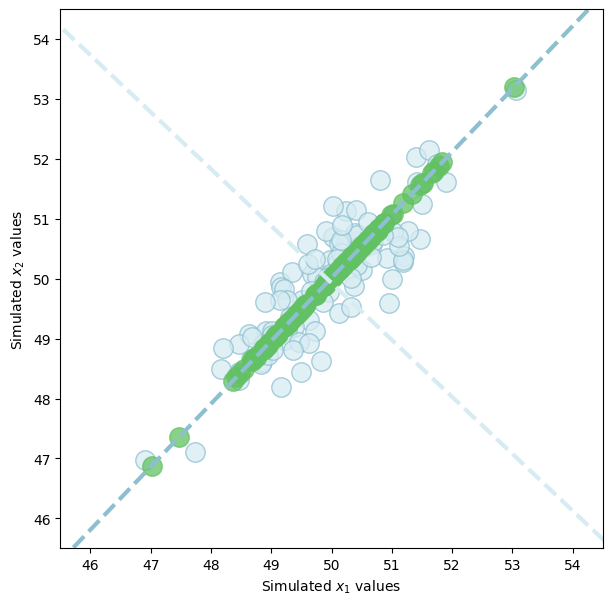

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkContext

# Initialize Spark Context (if not already initialized)
sc = SparkContext.getOrCreate()

# Your existing project_points_and_get_lines function...

# Assuming top_components_correlated and correlated_data are already defined
((x1, x2), (line1X1, line1X2), (line2X1, line2X2)) = project_points_and_get_lines(correlated_data, top_components_correlated, 5)

# Generate layout and plot data
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlabel(r'Simulated $x_1$ values')
ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5)
ax.set_ylim(45.5, 54.5)

# Plotting lines for the principal components
plt.plot(line1X1, line1X2, linewidth=3.0, color='#8cbfd0', linestyle='--')
plt.plot(line2X1, line2X2, linewidth=3.0, color='#d6ebf2', linestyle='--')

# Plotting original and projected data points
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, color='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
plt.scatter(x1, x2, s=14**2, color='#62c162', alpha=0.75)

plt.show()


In [44]:
import matplotlib.pyplot as plt

def prepare_plot(x_ticks, y_ticks, figsize=(7, 7)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    return fig, ax


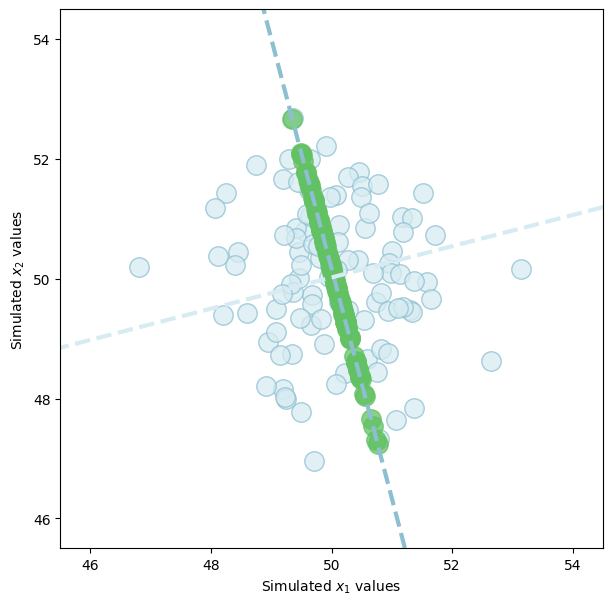

In [48]:
# Assuming project_points_and_get_lines, prepare_plot, data_random,
# random_data_rdd, and top_components_random are already defined

((x1, x2), (line1X1, line1X2), (line2X1, line2X2)) = project_points_and_get_lines(random_data_rdd, top_components_random, 5)

# Generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values')
ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5)
ax.set_ylim(45.5, 54.5)

# Plot the lines for principal components
plt.plot(line1X1, line1X2, linewidth=3.0, color='#8cbfd0', linestyle='--')
plt.plot(line2X1, line2X2, linewidth=3.0, color='#d6ebf2', linestyle='--')

# Scatter plot of original and projected data
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, color='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
plt.scatter(x1, x2, s=14**2, color='#62c162', alpha=0.75)

plt.show()


<ipython-input-49-cee0cf4ccfcd>:16: RuntimeWarning: covariance is not positive-semidefinite.
  data_threeD = np.random.multivariate_normal(mu, covariance_matrix, m)
<ipython-input-49-cee0cf4ccfcd>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Blues")


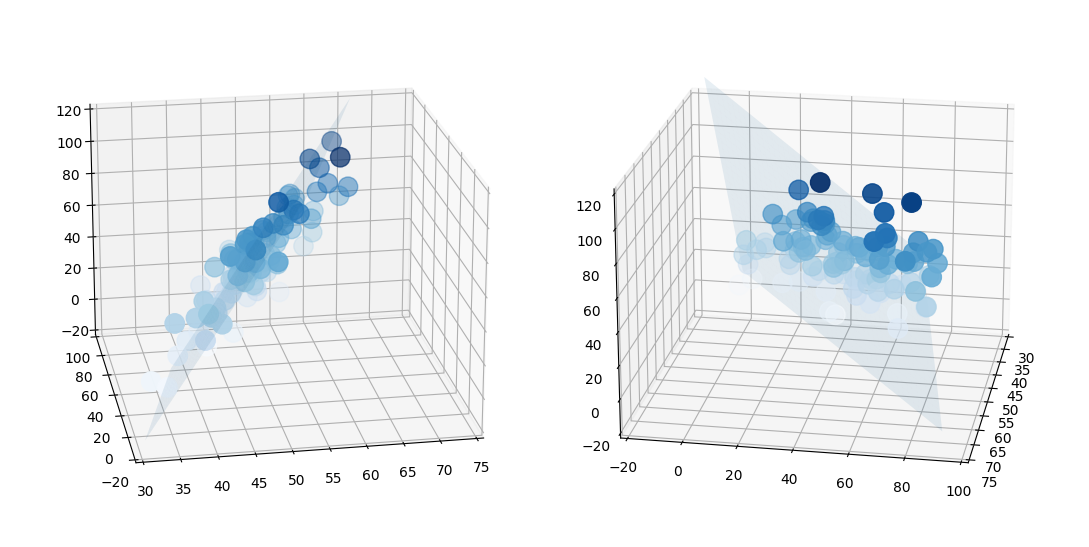

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

# Data generation
m = 100
mu = np.array([50, 50, 50])
r1_2, r1_3, r2_3 = 0.9, 0.7, 0.1
sigma1, sigma2, sigma3 = 5, 20, 20
covariance_matrix = np.array([[sigma1 ** 2, r1_2 * sigma1 * sigma2, r1_3 * sigma1 * sigma3],
                              [r1_2 * sigma1 * sigma2, sigma2 ** 2, r2_3 * sigma2 * sigma3],
                              [r1_3 * sigma1 * sigma3, r2_3 * sigma2 * sigma3, sigma3 ** 2]])
np.random.seed(142)
data_threeD = np.random.multivariate_normal(mu, covariance_matrix, m)

# Color mapping
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(data_threeD[:, 2])))[:, :3]

# Plotting
fig = plt.figure(figsize=(11, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.azim, ax1.elev = -100, 20
ax1.scatter(data_threeD[:, 0], data_threeD[:, 1], data_threeD[:, 2], c=clrs, s=14**2)

# Plane for first subplot
xx, yy = np.meshgrid(np.arange(-15, 10, 1), np.arange(-50, 30, 1))
normal = np.array([0.96981815, -0.188338, -0.15485978])
z = (-normal[0] * xx - normal[1] * yy) / normal[2]
xx, yy, z = xx + 50, yy + 50, z + 50
ax1.plot_surface(xx, yy, z, alpha=0.1)

# Axis limits for first subplot
ax1.set_xlim(30, 75), ax1.set_ylim(-20, 100), ax1.set_zlim(-20, 120)

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.azim, ax2.elev = 10, 20
ax2.scatter(data_threeD[:, 0], data_threeD[:, 1], data_threeD[:, 2], c=clrs, s=14**2)

# Plane for second subplot
ax2.plot_surface(xx, yy, z, alpha=0.1)

# Axis limits for second subplot
ax2.set_xlim(30, 75), ax2.set_ylim(-20, 100), ax2.set_zlim(-20, 120)

plt.tight_layout()
plt.show()


In [51]:
from pyspark import SparkContext
import numpy as np

# Initialize Spark Context (if not already initialized)
sc = SparkContext.getOrCreate()

# Assuming data_threeD is defined and is a NumPy array or a Python list
# Example: data_threeD = np.random.randn(100, 3)  # Replace with your actual data

# Create an RDD from data_threeD
threeD_data = sc.parallelize(data_threeD)

# Now, apply PCA
components_threeD, threeD_scores, eigenvalues_threeD = pca(threeD_data, 2)

# Corrected print statements for Python 3
print('components_threeD: \n{0}'.format(components_threeD))
print('\nthreeD_scores (first three): \n{0}'.format('\n'.join(map(str, threeD_scores.take(3)))))
print('\neigenvalues_threeD: \n{0}'.format(eigenvalues_threeD))



components_threeD: 
[[ 0.23952078  0.045635  ]
 [ 0.61699931  0.76409466]
 [ 0.74962768 -0.64348799]]

threeD_scores (first three): 
[85.25798606 -8.29694407]
[89.66337911 15.73381517]
[ 75.92616872 -20.5015709 ]

eigenvalues_threeD: 
[614.46863537 349.47737219   5.85043581]


In [52]:
import numpy as np

# Assuming components_threeD, eigenvalues_threeD, and threeD_scores are already defined

# Test 1: Check the shape of components_threeD
assert components_threeD.shape == (3, 2), 'incorrect shape for components_threeD'

# Test 2: Check the sum of eigenvalues_threeD
assert np.allclose(np.sum(eigenvalues_threeD), 969.796443367), 'incorrect value for eigenvalues_threeD'

# Test 3: Check the absolute sum of components_threeD
assert np.allclose(np.abs(np.sum(components_threeD)), 1.77238943258), 'incorrect value for components_threeD'

# Test 4: Check the absolute sum of the first three scores in threeD_scores
assert np.allclose(np.abs(np.sum(threeD_scores.take(3))), 237.782834092), 'incorrect value for threeD_scores'

print("All tests passed!")


All tests passed!


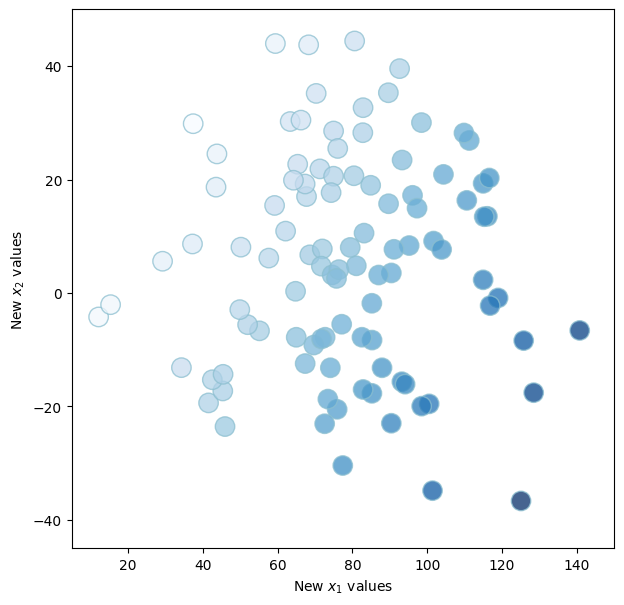

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(x_ticks, y_ticks, figsize=(7, 7)):
    """Prepare a matplotlib plot with specified x and y ticks, and figure size."""
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    return fig, ax

# Assuming scores_threeD and clrs are already defined

# Convert the RDD threeD_scores to a NumPy array
scores_threeD = np.asarray(threeD_scores.collect())

# Generate layout and plot data
fig, ax = prepare_plot(np.arange(20, 150, 20), np.arange(-40, 110, 20))
ax.set_xlabel(r'New $x_1$ values')
ax.set_ylabel(r'New $x_2$ values')
ax.set_xlim(5, 150)
ax.set_ylim(-45, 50)

# Scatter plot of PCA scores
plt.scatter(scores_threeD[:, 0], scores_threeD[:, 1], s=14**2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)

plt.show()


In [55]:
def variance_explained(data, k=1):
    """Calculate the fraction of variance explained by the top `k` eigenvectors.

    Args:
        data (RDD of np.ndarray): An RDD that contains NumPy arrays which store the
            features for an observation.
        k (int): The number of principal components to consider.

    Returns:
        float: A number between 0 and 1 representing the percentage of variance explained
            by the top `k` eigenvectors.
    """
    components, scores, eigenvalues = pca(data, k)
    retained_variance = sum(eigenvalues[:k]) / np.sum(eigenvalues)
    return retained_variance


In [56]:
# Assuming the pca function and variance_explained function are already defined

# Calculate the variance explained for different datasets and components
variance_random_1 = variance_explained(random_data_rdd, 1)
variance_correlated_1 = variance_explained(correlated_data, 1)
variance_random_2 = variance_explained(random_data_rdd, 2)
variance_correlated_2 = variance_explained(correlated_data, 2)
variance_threeD_2 = variance_explained(threeD_data, 2)

# Print the results
print('Percentage of variance explained by the first component of random_data_rdd: {:.1f}%'.format(variance_random_1 * 100))
print('Percentage of variance explained by both components of random_data_rdd: {:.1f}%'.format(variance_random_2 * 100))
print('\nPercentage of variance explained by the first component of correlated_data: {:.1f}%'.format(variance_correlated_1 * 100))
print('Percentage of variance explained by both components of correlated_data: {:.1f}%'.format(variance_correlated_2 * 100))
print('\nPercentage of variance explained by the first two components of threeD_data: {:.1f}%'.format(variance_threeD_2 * 100))


Percentage of variance explained by the first component of random_data_rdd: 58.8%
Percentage of variance explained by both components of random_data_rdd: 100.0%

Percentage of variance explained by the first component of correlated_data: 93.4%
Percentage of variance explained by both components of correlated_data: 100.0%

Percentage of variance explained by the first two components of threeD_data: 99.4%
